**MASK RCNN Using Tensorflow OBJECT DETECTION API**

# TFOD_SETUP

**Step1: Mount your google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir mask_rcnn_training

In [ ]:
%cd mask_rcnn_training/

/content/mask_rcnn_training


**Step 2: Download the tensorflow repo**

In [ ]:
!git clone "https://github.com/tensorflow/models.git"

Cloning into 'models'...
remote: Enumerating objects: 71626, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 71626 (delta 2), reused 12 (delta 2), pack-reused 71614
Receiving objects: 100% (71626/71626), 578.84 MiB | 31.16 MiB/s, done.
Resolving deltas: 100% (50653/50653), done.


**Step 3: Download the mask rcnn pretrained model and unzip it**

In [ ]:
!wget "http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz"

--2022-04-03 09:20:29--  http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.148.128, 2607:f8b0:4001:c54::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.148.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177817887 (170M) [application/x-tar]
Saving to: ‘mask_rcnn_inception_v2_coco_2018_01_28.tar.gz’

mask_rcnn_inception 100%[===================>] 169.58M   106MB/s    in 1.6s    

2022-04-03 09:20:31 (106 MB/s) - ‘mask_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [177817887/177817887]



In [ ]:
!tar -xzvf "/content/mask_rcnn_training/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz" -C "/content/mask_rcnn_training"

mask_rcnn_inception_v2_coco_2018_01_28/
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
mask_rcnn_inception_v2_coco_2018_01_28/checkpoint
mask_rcnn_inception_v2_coco_2018_01_28/pipeline.config
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.meta
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/saved_model.pb
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/variables/
mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb


In [ ]:
!mv "mask_rcnn_inception_v2_coco_2018_01_28" "mask_rcnn"

In [ ]:
!rm "mask_rcnn_inception_v2_coco_2018_01_28.tar.gz"

**Step 4: Install necessary requirements**

In [ ]:
%tensorflow_version 1.x # we are using tensorflow 1.x for our training

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x # we are using tensorflow 1.x for our training`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
!pip install pillow lxml Cython contextlib2 jupyter matplotlib pandas opencv-python 

In [ ]:
%cd /content/mask_rcnn_training/models/research

/content/mask_rcnn_training/models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=. ## to convet protobuff to .py file

In [ ]:
%cd /content/mask_rcnn_training

/content/mask_rcnn_training


**Step 5: upload data and other requirements in zip file format**

In data folder you must have: 


*   training-image
*   train-json(annotated)
*   test-image
*   test-json(annotated)
*   labelmap.pbtxt
*   create_tf_records







In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.zip to data.zip
User uploaded file "data.zip" with length 2569380 bytes


In [ ]:
!unzip -uq "/content/mask_rcnn_training/data.zip" -d "/content/mask_rcnn_training"

In [ ]:
%rm data.zip

`**step 6: convert .json to .tf-records and create tf-records**

In [ ]:
from google.colab import files
files.view('data/create_tf_records.py')

<IPython.core.display.Javascript object>

changes in create_tf_records.py:


*   trainImagePath(index-246)-> path for train_image
*   trainImagePath(json)-> path for tain_image(json)
*   labelMapPath 
*   outputFolderPath(index-249)->path for output (train)

change the path save and close the file






**json -> tf-rcords for training dataset**

In [ ]:
!python /content/mask_rcnn_training/data/create_tf_records.py   # to create tf records

On image %d 0
Successfully created TFRecord to /content/mask_rcnn_training/data/custom_train_dog.record.


**json -> tf-records for validation dataset**

In [ ]:
from google.colab import files
files.view('data/create_tf_records.py')

<IPython.core.display.Javascript object>

changes in create_tf_records.py:


*   trainImagePath(index-246)->path of test_Image
*   trainImagePath(json)-> path of test_Image(json)
*   labelMapPath 
*   outputFolderPath(index-249)-> path for output (test)

change the path save and close the file






In [ ]:
!python /content/mask_rcnn_training/data/create_tf_records.py 

On image %d 0
Successfully created TFRecord to /content/mask_rcnn_training/data/custom_val_dog.record.


**Step 7: move the custom_train_dog.record,custom_val_dog.record and setup.py to research folder. And install setup.py**

In [ ]:
%mv "/content/mask_rcnn_training/data/custom_train_dog.record" "/content/mask_rcnn_training/models/research"
%mv "/content/mask_rcnn_training/data/custom_val_dog.record" "/content/mask_rcnn_training/models/research"
%mv "/content/mask_rcnn_training/data/setup.py" "/content/mask_rcnn_training/models/research"

In [ ]:
!python models/research/setup.py install

running install
running bdist_egg
running egg_info
creating object_detection.egg-info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
reading manifest file 'object_detection.egg-info/SOURCES.txt'
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
co

In [ ]:
%cd models/research/
!pip install -e .  #To install Object detection as local package
#%cd /content/mask_rcnn_training

/content/mask_rcnn_training/models/research
Obtaining file:///content/mask_rcnn_training/models/research
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1
  Running setup.py develop for object-detection


# TRAINING

**Step 1: create a folder named training in research folder and move frozen_inference_graph.pb  from mask_rcnn(pretrained_model) folder to training folder,move labelmap.pbtxt from data folder to training folder.And copy the file named mask_rcnn_inception_v2_coco.config from the given path /content/mask_rcnn_training/models/research/object_detection/samples/configs/mask_rcnn_inception_v2_coco.config and paste it in training folder.**

In [ ]:
!mkdir training

In [ ]:
%mv "/content/mask_rcnn_training/mask_rcnn" "/content/mask_rcnn_training/models/research"
%mv "/content/mask_rcnn_training/data/labelmapdog.pbtxt"  "/content/mask_rcnn_training/models/research/training"
%cp "/content/mask_rcnn_training/models/research/object_detection/samples/configs/mask_rcnn_inception_v2_coco.config" "/content/mask_rcnn_training/models/research/training"

**Step 2: changes to be made in mask_rcnn_inception_v2_coco.config**

changes:

*   10->num_classes-1
*   127->fine_tune_checkpoint-"mask_rcnn/model.ckpt"
*   133->num_steps- 200
*   142->input_path-"custom_train_dog.record"
*   144->label_map_path-"training/labelmapdog.pbtxt"
*   158->input path-"custom_val_dog.record".
*   160->label_map_path-"training/labelmapdog.pbtxt"

make the above changes save and close the file







In [ ]:
from google.colab import files
files.view('/content/mask_rcnn_training/models/research/training/mask_rcnn_inception_v2_coco.config')

<IPython.core.display.Javascript object>

**Step 3: copy train.py from object_detection/legacy and paste the file in research folder and start the training**

In [ ]:
%cp "/content/mask_rcnn_training/models/research/object_detection/legacy/train.py" "/content/mask_rcnn_training/models/research"
%cp -R /content/mask_rcnn_training/models/research/slim/deployment /content/mask_rcnn_training/models/research
%cp -R /content/mask_rcnn_training/models/research/slim/nets /content/mask_rcnn_training/models/research

In [ ]:
!pip install tf_slim
!pip install numpy==1.19.5

     |████████████████████████████████| 352 kB 5.3 MB/s 
     |████████████████████████████████| 14.8 MB 5.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lucid 0.3.10 requires umap-learn, which is not installed.
tensorflow 1.15.2 requires gast==0.2.2, but you have gast 0.5.3 which is incompatible.
lucid 0.3.10 requires numpy<=1.19, but you have numpy 1.19.5 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/mask_rcnn_inception_v2_coco.config

Using TensorFlow backend.
Instructions for updating:
Use object_detection/model_main.py.
W0403 09:39:38.063947 140501576480640 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/absl/app.py:258: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.
Instructions for updating:
Please switch to tf.train.create_global_step
W0403 09:39:38.077206 140501576480640 deprecation.py:323] From /content/mask_rcnn_training/models/research/object_detection/legacy/trainer.py:265: create_global_step (from tf_slim.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Please switch to tf.train.create_global_step
INFO:tensorflow:Reading unweighted datasets: ['custom_train_dog.record']
I0403 09:39:38.099745 140501576480640 dataset_builder.py:162] Reading unweighted datasets: ['custom_train_dog.record']
INFO:tensorflow:Reading record datasets for input file: ['custom_tr

All the logs and checkpoinks will be stored in training folder

**Step 4: ckpt to pb conversion**

In [ ]:
%cp "/content/mask_rcnn_training/models/research/object_detection/export_inference_graph.py" "/content/mask_rcnn_training/models/research"

In [ ]:
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path training/mask_rcnn_inception_v2_coco.config --trained_checkpoint_prefix training/model.ckpt-2000 --output_directory frozen_inference_graph

Using TensorFlow backend.
Instructions for updating:
Please use `layer.__call__` method instead.
W0403 09:59:03.529036 140013273245568 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tf_slim/layers/layers.py:2802: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:Scale of 0 disables regularizer.
I0403 09:59:05.111294 140013273245568 regularizers.py:99] Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
I0403 09:59:05.266314 140013273245568 regularizers.py:99] Scale of 0 disables regularizer.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0403 09:59:05.266767 140013273245568 convolutional_box_predictor.py:155] depth of additional conv before box predictor: 0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0403 09:59:05.342265

**Training has completed successfully and model has been saved in research/frozen_inference_graph/ utilize that model for inferencing**

# PREDICTION

**Step 1: necessary imports**

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')


Object detection imports
Here are the imports from the object detection module.

In [ ]:
from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util

**Step 2: Model preparation**

In [ ]:
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = "/content/mask_rcnn_training/models/research/frozen_inference_graph/frozen_inference_graph.pb"

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('training', 'labelmapdog.pbtxt')

**Step 4: Load a (frozen) Tensorflow model into memory.**

In [ ]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

**Step 5: Loading label map**

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

**Step 6: Helper code**

In [ ]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

**Step 7: upload test images and unzip it.**

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test_images.zip to test_images.zip
User uploaded file "test_images.zip" with length 470485 bytes


In [ ]:
!unzip -uq "/content/mask_rcnn_training/models/research/test_images.zip" -d "/content/mask_rcnn_training/models/research/"

In [ ]:
%rm test_images.zip

**Step 8:Detection**

In [ ]:
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 11) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [ ]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

Instructions for updating:
box_ind is deprecated, use box_indices instead


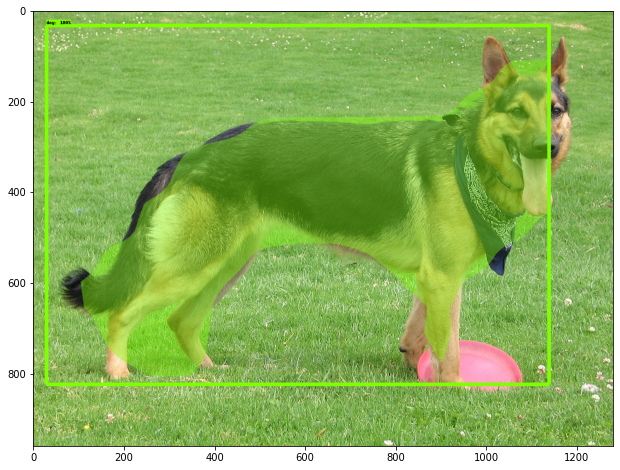

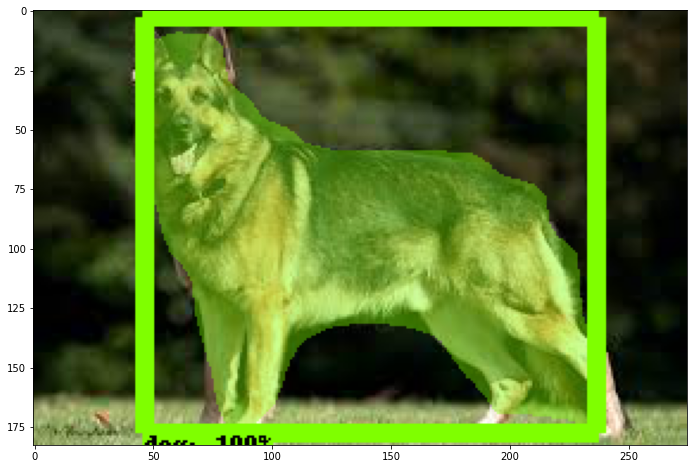

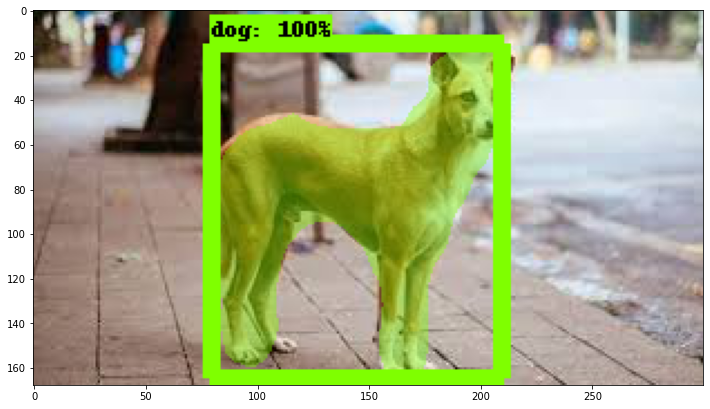

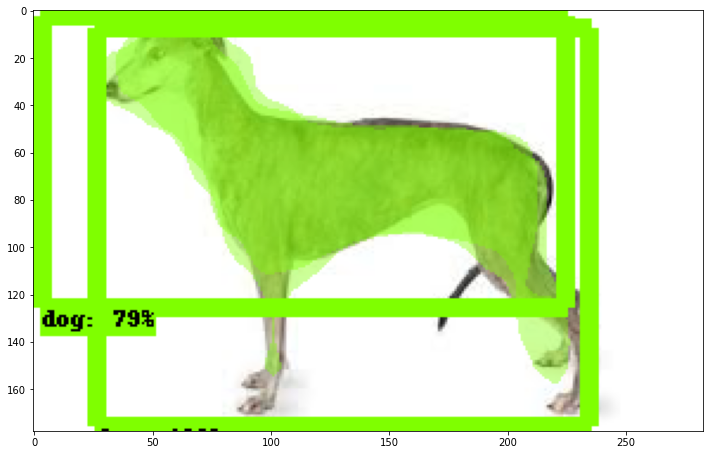

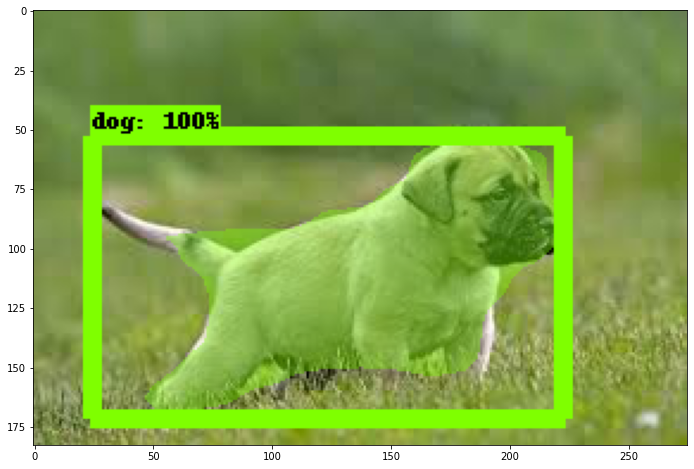

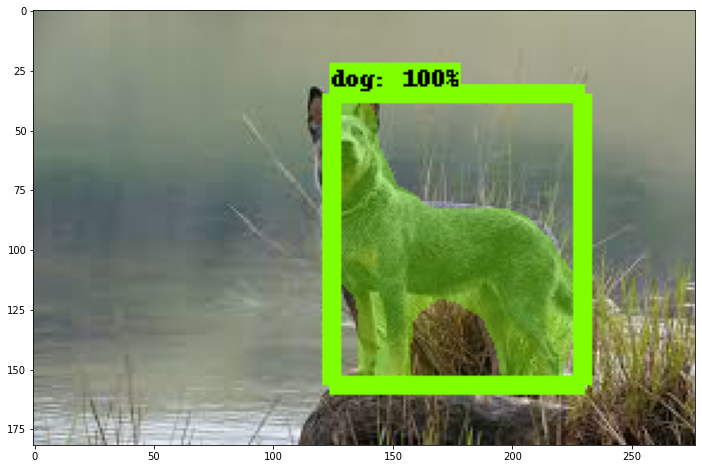

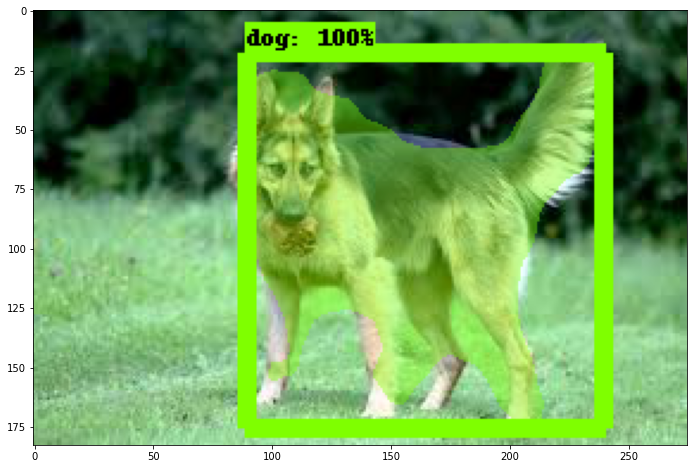

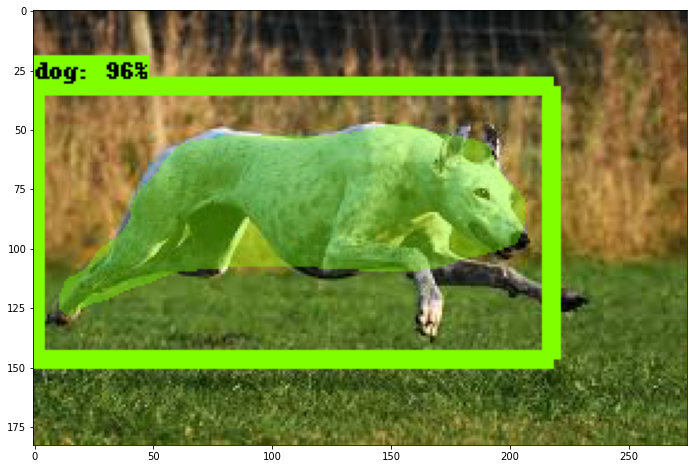

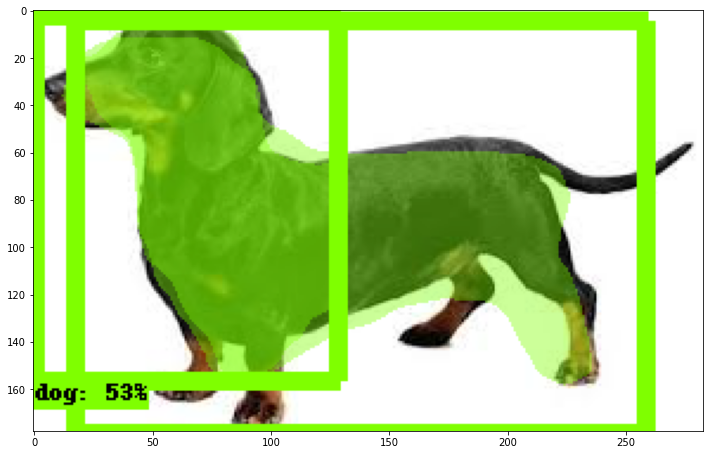

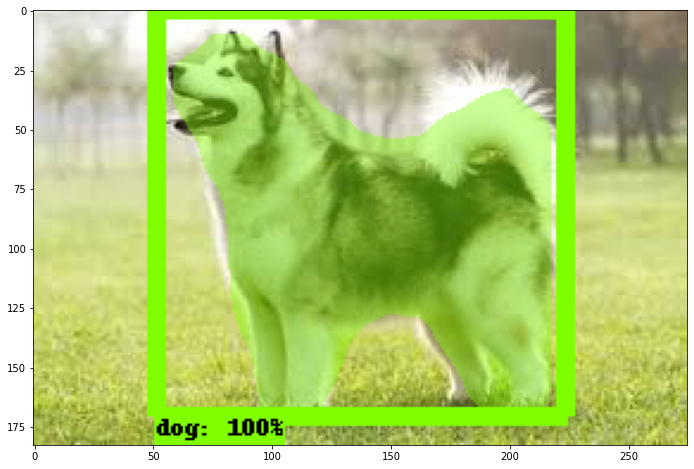

In [ ]:
%matplotlib inline
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)

**Result**

We have got a pretty good result with small dataset and with 2000 steps if we increase the steps and dataset size then the result will be much better then this